In [1]:
# Pre-requirements
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time

# Task 5 Numerical solution of ODEs
(a) Review algorithms/methods for the numerical integration/solution of ODEs (see lecture). Imple-ment such a procedures, e.g. a Runge-Kutta method.

(b) Analyse numerical stability and runtime.

(c) Compare the results with a standard ODE solver.

## Implementation

All implemented numerical solvers are collected in a class calles 'solver'. The individual algorithms are presented in detail afterwards.

In [2]:
def analyze(solution, numSol):
    # Calculate errors
    absError = []
    relError = []
    for i in range(len(solution)):
        absError.append(np.abs(solution[i]-numSol[i]))
        relError.append(absError[i]/np.abs(solution[i]))
    return [absError, relError]
    
class solver:
    
    # explicit euler method
    def expliciteEuler(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]

        h = (t[-1]-t[0])/len(t)
        for k in range(len(t)):
            for i in range (length):
                var_vec[0][i] = var_vec[1][i]

            it = model(var_vec[0], k, *args)
            #print (it)
            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + h * it[i]
            res_vec.append(np.array(tmp))
        return np.array(res_vec)
    
    # Runge method
    def runge(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]
        # Stepsize
        h = (t[-1]-t[0])/len(t)

        for k in range(len(t)):
            for i in range (length):
                var_vec[0][i] = var_vec[1][i]
                
            it = model(var_vec[0], k, *args)
            xhalf = []
            for i in range(length):
                xhalf.append(var_vec[0][i] + 0.5*h*it[i])
                
            gradient = model(xhalf, k, *args)
            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + h*gradient[i]
            res_vec.append(np.array(tmp))
        return np.array(res_vec)
    
    # Heun method/runge-kutta2
    def heun(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]
        # Stepsize
        h = (t[-1]-t[0])/len(t)
        for k in range(len(t)):
            for i in range (length):
                var_vec[0][i] = var_vec[1][i]            

            dy0 = model(var_vec[0], k, *args)
            x1tmp = []
            for i in range(length):
                x1tmp.append(var_vec[0][i] + h*dy0[i])
            dy1 = model(x1tmp, k, *args)
            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + h*0.5*(dy0[i] + dy1[i])
            res_vec.append(np.array(tmp))
        return np.array(res_vec)
    
    def rungeKuttaold(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]
        # Stepsize
        h = (t[-1]-t[0])/len(t)

        for k, t0 in enumerate(t):

            for i in range (length):
                var_vec[0][i] = var_vec[1][i]            

            # u1 = h * y'()
            v1 = h * model(var_vec[0], t, *args)
            v2 = h * model(var_vec[0] + 1/2 * h, t, *args)
            v3 = h * model(var_vec[0] + h, t, *args)

            y = y(x0) + 1/2 * (u1 + u2)

            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + 1/6 * (v1[i] + 4 * v2[i] + v3)
            res_vec.append(np.array(tmp))
        return np.array(res_vec)
    
    
    # Runge Kutta 2 equals heun method, X0 is Y0 for real
    def rungeKutta3(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]
        # Stepsize
        h = (t[-1]-t[0])/len(t)
        #print(h)
        for k, t0 in enumerate(t):

            for i in range (length):
                var_vec[0][i] = var_vec[1][i]
            # v1 = h * model(y0)
            v1 = [h*l for l in model(var_vec[0], t, *args)]
            # v2 = h * model(y0 + 1/2 * v1)
            v2 = model([h * l for l in [sum(x) for x in zip(var_vec[0], [e * 0.5 for e in v1])]], t, *args)
            v3 = model([h * l for l in [sum(x) for x in zip(var_vec[0], [e * 2 for e in v2], [e * -1 for e in v2])]], t, *args)

            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + 1/6 * (v1[i] + 4 * v2[i] + v3[i])
            res_vec.append(np.array(tmp))
        return np.array(res_vec)
    
    def rungeKutta4(model, X0, t, args=()):
        length = len(X0)
        res_vec = []
        var_vec = np.empty([2, length])
        for i in range(length):
            var_vec[1][i] = X0[i]
        # Stepsize
        h = (t[-1]-t[0])/len(t)
        for k, t0 in enumerate(t):

            for i in range (length):
                var_vec[0][i] = var_vec[1][i]            
            w1 = [h*l for l in model(var_vec[0], t, *args)]
            w2 = model([h * l for l in [sum(x) for x in zip(var_vec[0], [e * 0.5 for e in w1])]], t, *args)
            w3 = model([h * l for l in [sum(x) for x in zip(var_vec[0], [e * 0.5 for e in w2])]], t, *args)
            w4 = model([h * l for l in [sum(x) for x in zip(var_vec[0], w3)]], t, *args)

            tmp = []
            for i in range(length):
                tmp.append(var_vec[0][i])
                var_vec[1][i] = var_vec[0][i] + 1/6 * (w1[i] + 2 * w2[i] + 2 * w3[i] + w4[i])
            res_vec.append(np.array(tmp))
        return np.array(res_vec)

## Algorithm analyse

In this section we will analyse multiple numerical methods for solving ODE's.

In general we try to find a function $[a,b]\rightarrow \mathbb{R}^d$ with
$$
y'(x) = f(x,y(x)) \forall_x [a,b],\\
y(a)=y_0 \in \mathbb{R}^d
$$

To verify the results, we will use two functions: (1)
$$ 
y'=0.2*y
$$
and a simple stiff equation(2):
$$
y'(t) = -4 * (y(t)-2), y(0) = 1
$$
For both equations we can calculate the exact solution:
$$
y1(x) = e^{0.2*x}\\
y2(t) = 2 - e^{-4t}
$$
This helps us to calculate the error for all our numerical approaches.


In [3]:
def testModel1(y, t, r):
    dy = r*y[0]
    return [dy]

def func1 (x):
    return np.e**(0.2*x)

# Stiff equation
def testModel2(y, t, r):
    dy = -4 * ( y[0] - 2)
    return [dy]
    
def func2 (x):
    return 2-np.e**(-4*x)

def testModel3 (y, t, g, l, b):
    phi = y[0]
    omega = y[1]
    dphidt = omega
    domegadt = -b * omega - (g/l) * np.sin(phi)
    return [dphidt, domegadt]

g = 9.81
l = 1
b = 0

### Explicite Euler method

One very simple approach is the (explicite) euler method. It is a straight forward method to iteratively calculate a solution for our code.

#### mathematical description

We take the gradient from our starting point to aproximate the next points. With step size h we get:
$$
y_1 = y_0 + h * y'(y_0)\\
y_2 = y_1 + h * y'(y_1)\\
...\\
y_n = y_{n-1} + h * y'(y_{n-1})\\
$$

For a small step size local truncation error is approximately proportional to $h^2$.  
The global truncation error is approximately proportional to h.
[Quellen]



#### Stepsize variation

In the following code we calculate and print a solution for the ode with different step sizes.
For every step size we calculate the relative and absolute error over time

##### testModel1

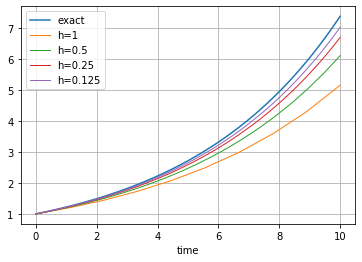

In [4]:
# testModel1
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.plot(t, func1(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
plt.plot(t,res1[:,0], linewidth=1, label='h=1')

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')

plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

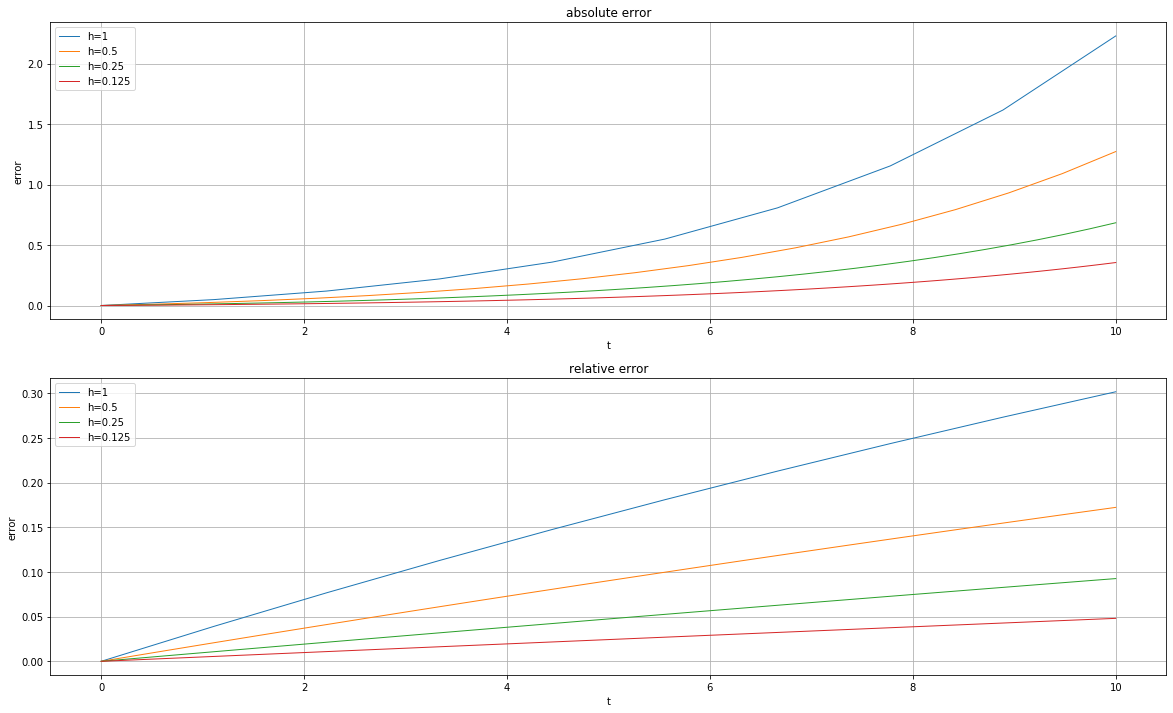

In [5]:
t = np.linspace(0, 10, 10)
e1 = analyze(func1(t), res1[:,0])
t = np.linspace(0, 10, 20)
e2 = analyze(func1(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func1(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func1(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[0], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[1], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

##### testModel2


/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

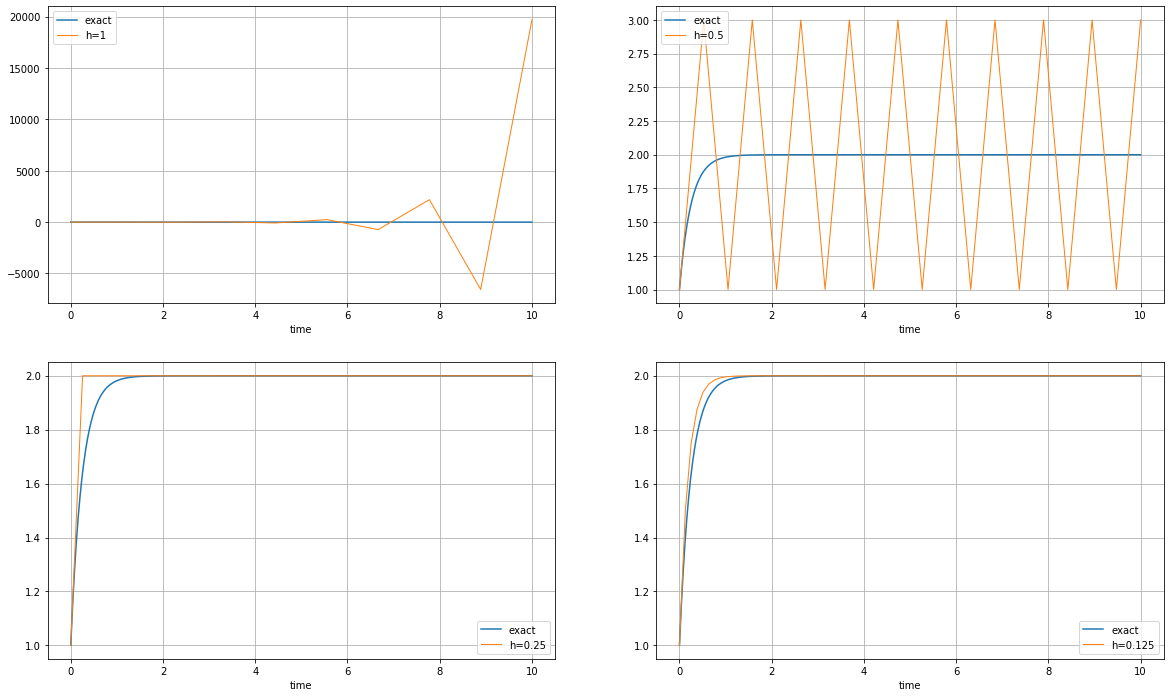

In [6]:
# testModel2
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.subplot(2, 2, 1)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 2)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 3)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 4)
plt.plot(t, func2(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 1)
plt.plot(t,res1[:,0], linewidth=1, label='h=1')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 2)
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 3)
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 4)
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.rcParams['figure.figsize'] = (20,12)
plt.show()

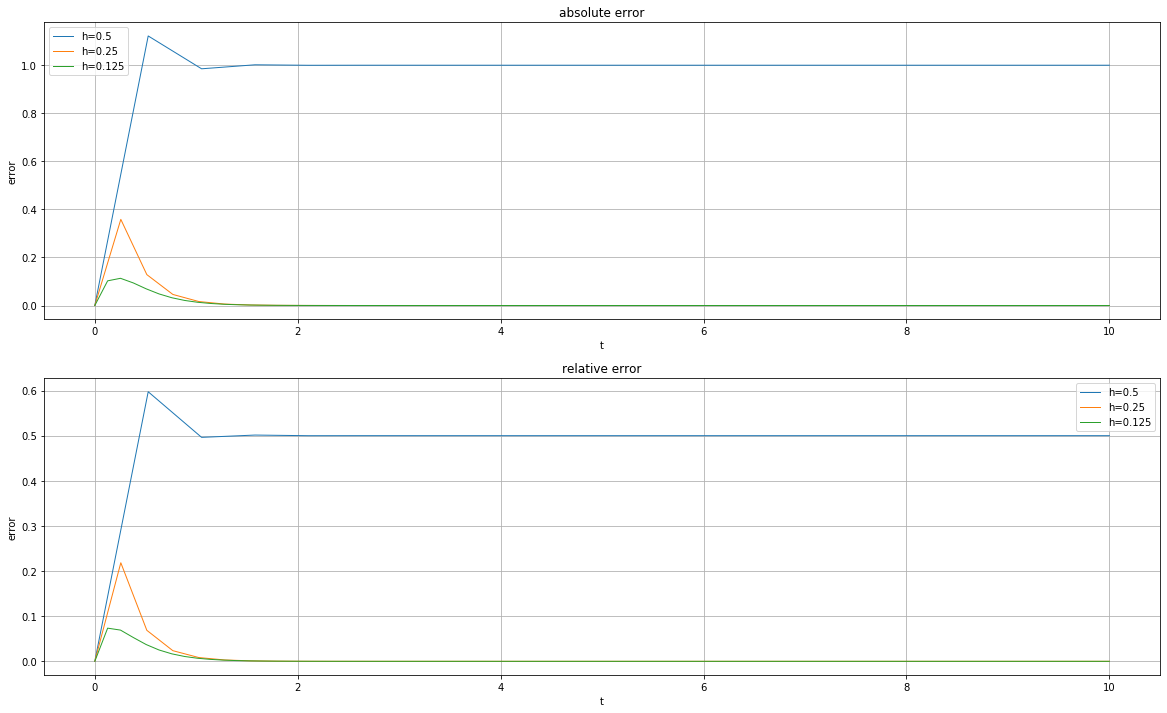

In [7]:
t = np.linspace(0, 10, 10)
e1 = analyze(func2(t), res1[:,0])  # Not plottet, error way too large
t = np.linspace(0, 10, 20)
e2 = analyze(func2(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func2(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func2(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[0], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[1], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

### Runge method

#### Description
With the runge method, we use the gradient at $x_0+\frac{1}{2}$ to calculate our next point at $x_1$.  
The methode is decribed as follows:
$$
y_{i+1}=y_i + h * y'(y_{i+\frac{1}{2}})
$$

#### Stepsize variation

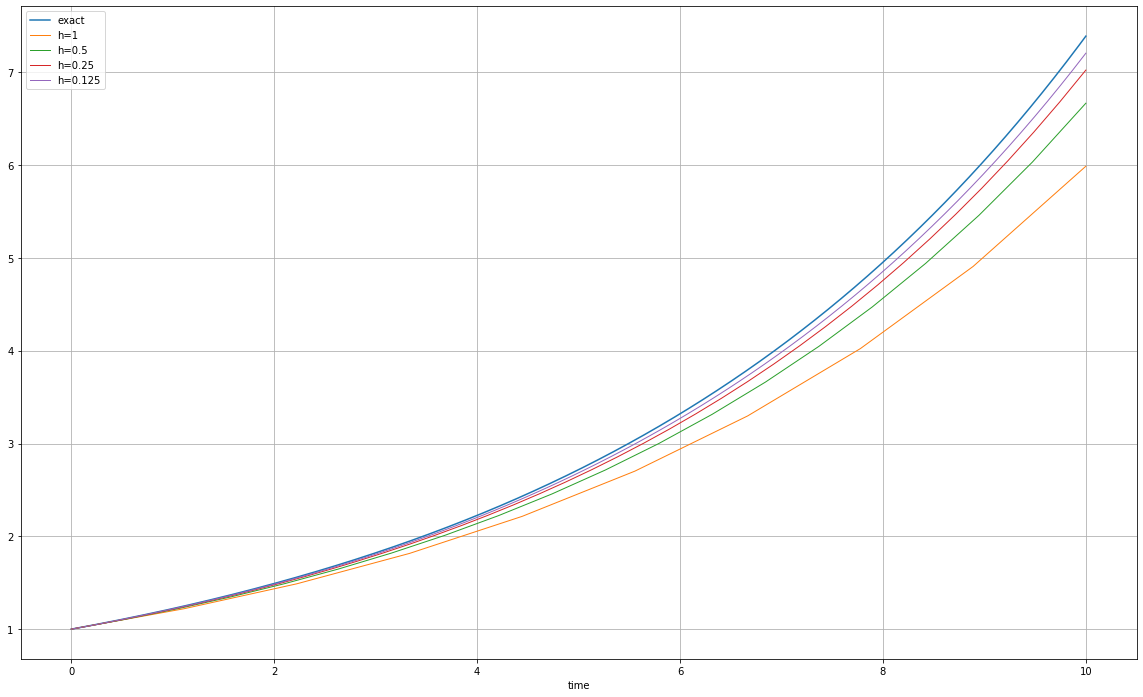

In [8]:
# testModel1
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.plot(t, func1(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.runge(testModel1, y0, t, args=(0.2,))
plt.plot(t,res1[:,0], linewidth=1, label='h=1')

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.runge(testModel1, y0, t, args=(0.2,))
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.runge(testModel1, y0, t, args=(0.2,))
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.runge(testModel1, y0, t, args=(0.2,))
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')

plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

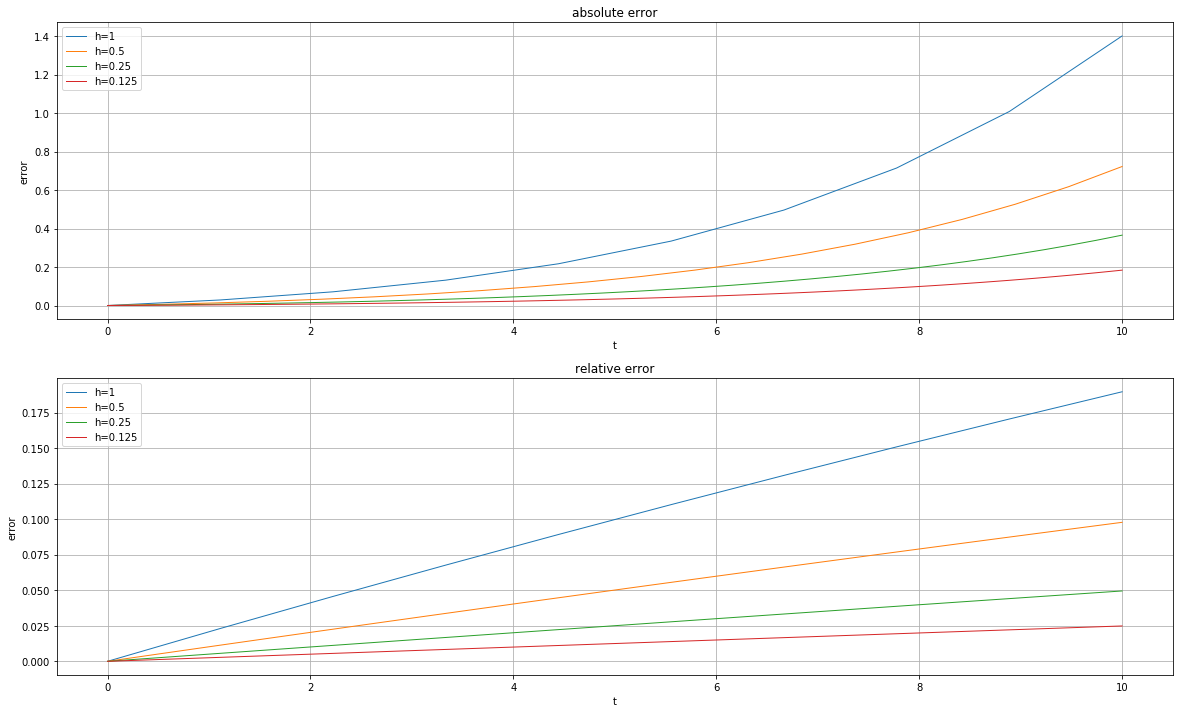

In [9]:
t = np.linspace(0, 10, 10)
e1 = analyze(func1(t), res1[:,0])
t = np.linspace(0, 10, 20)
e2 = analyze(func1(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func1(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func1(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[0], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[1], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

##### testMethod2

/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

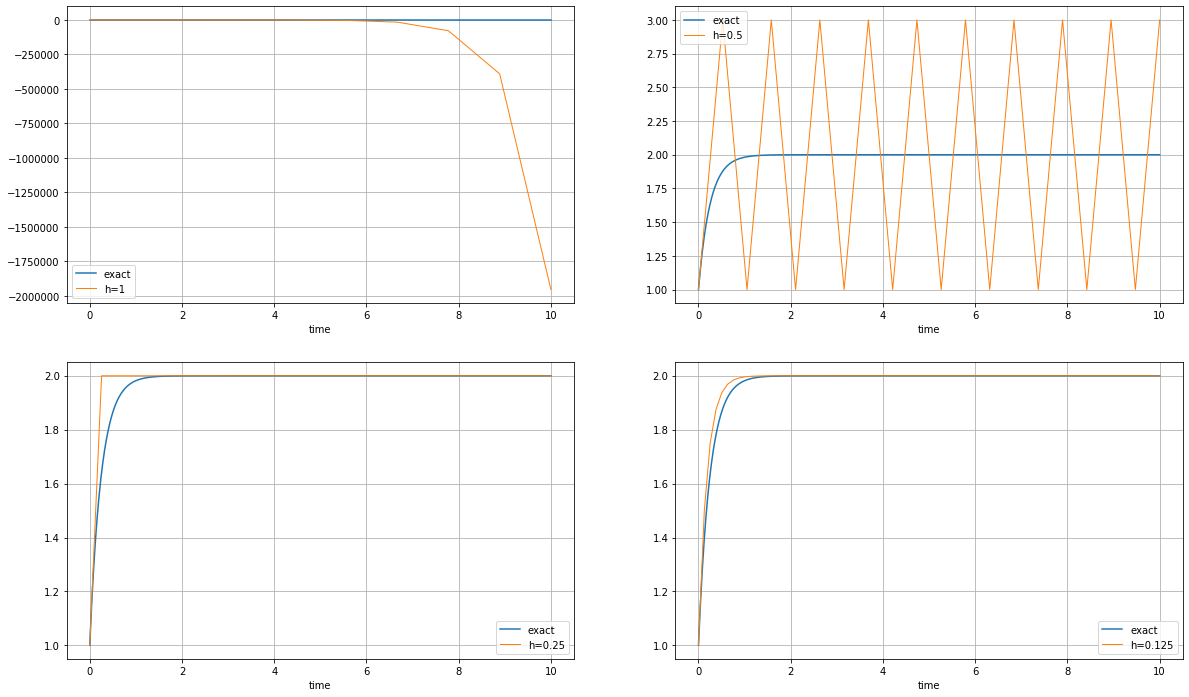

In [10]:
# testModel2
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.subplot(2, 2, 1)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 2)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 3)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 4)
plt.plot(t, func2(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.runge(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 1)
plt.plot(t,res1[:,0], linewidth=1, label='h=1')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 2)
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 3)
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 4)
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.rcParams['figure.figsize'] = (20,12)
plt.show()

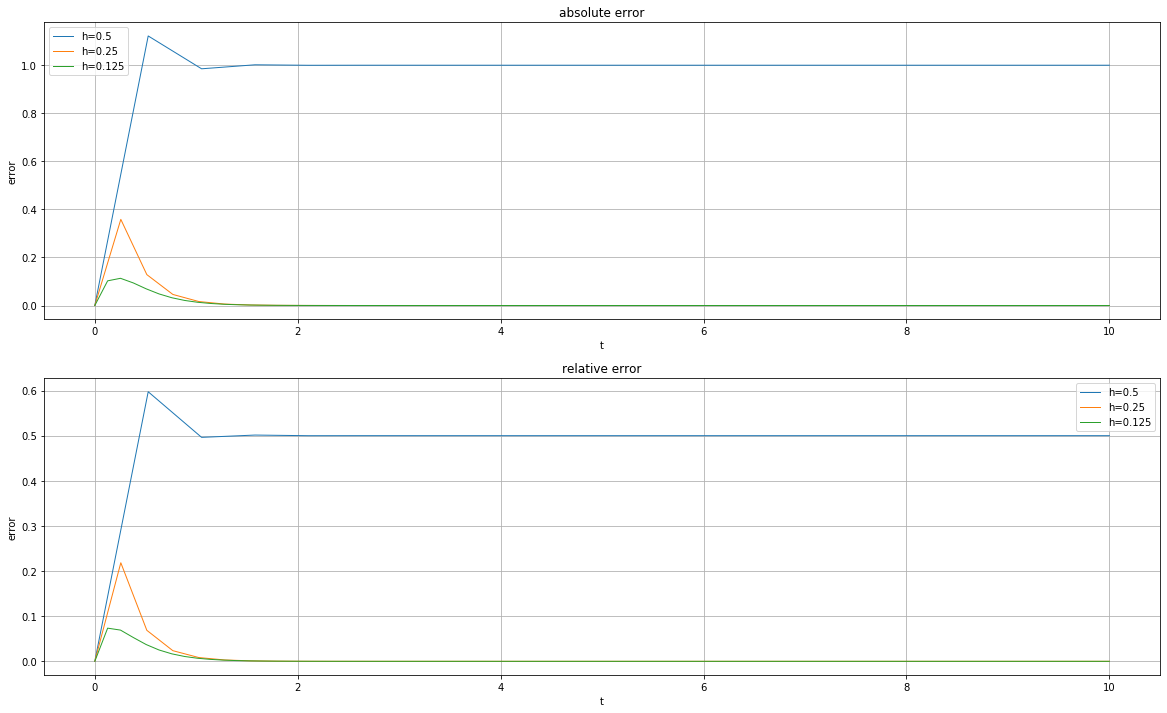

In [11]:
t = np.linspace(0, 10, 10)
e1 = analyze(func2(t), res1[:,0])  # Not plottet, error way too large
t = np.linspace(0, 10, 20)
e2 = analyze(func2(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func2(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func2(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[0], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[1], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

### Heun method

#### Description

This methode is a combination of the Crank-Niccolson methode and an euler approximation.  
We will use the formular:
$$
y_{i+1}=y_i + h*\frac{y'(x_i)+y'(x_{i+1}}{2})
$$

#### Stepsize variation

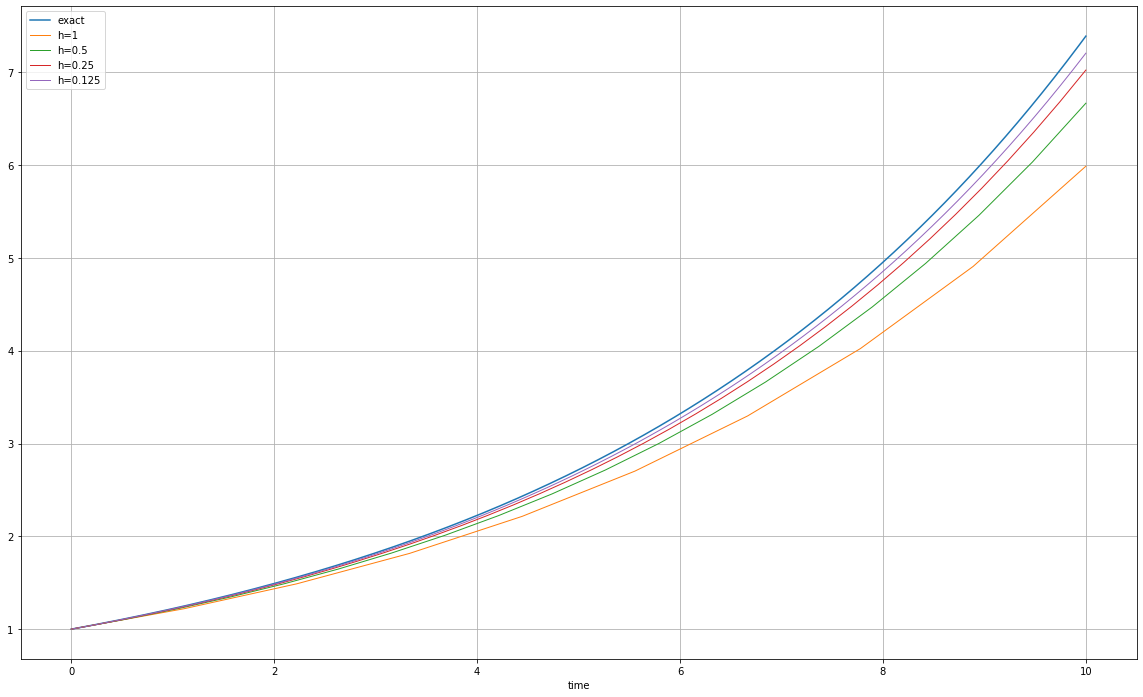

In [12]:
# testModel1
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.plot(t, func1(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.heun(testModel1, y0, t, args=(0.2,))
plt.plot(t,res1[:,0], linewidth=1, label='h=1')

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.heun(testModel1, y0, t, args=(0.2,))
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.heun(testModel1, y0, t, args=(0.2,))
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.heun(testModel1, y0, t, args=(0.2,))
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')

plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

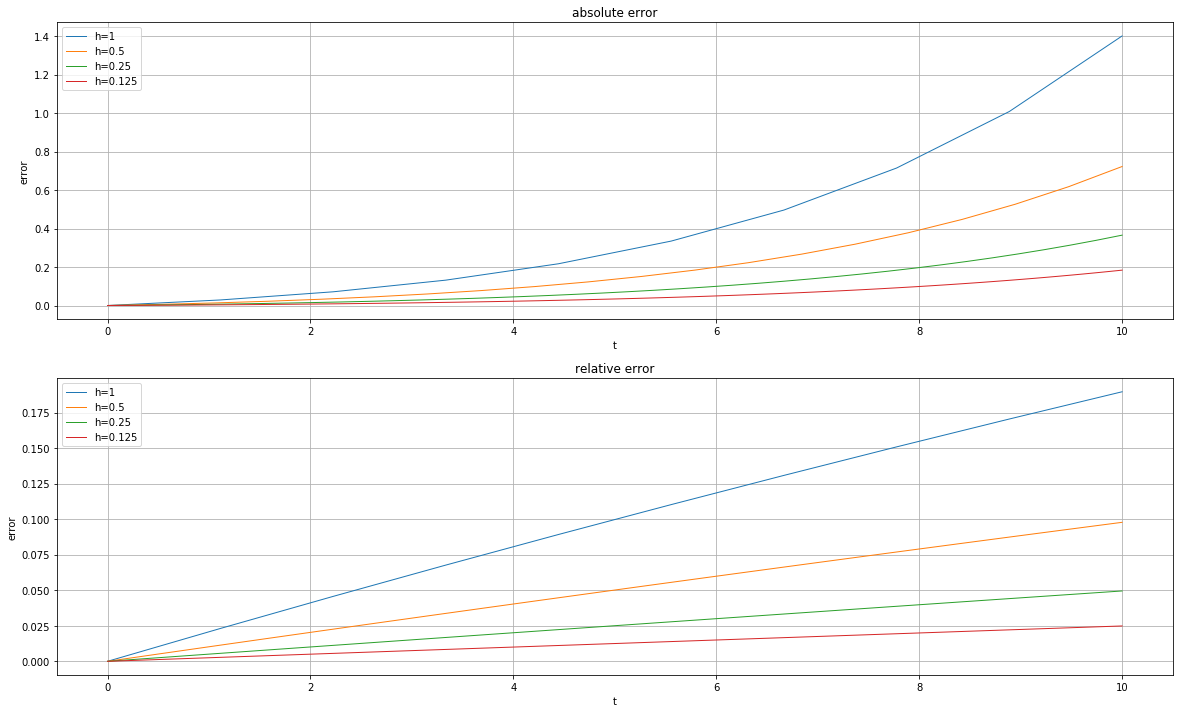

In [13]:
t = np.linspace(0, 10, 10)
e1 = analyze(func1(t), res1[:,0])
t = np.linspace(0, 10, 20)
e2 = analyze(func1(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func1(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func1(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[0], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[1], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

#### testMethod2

/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

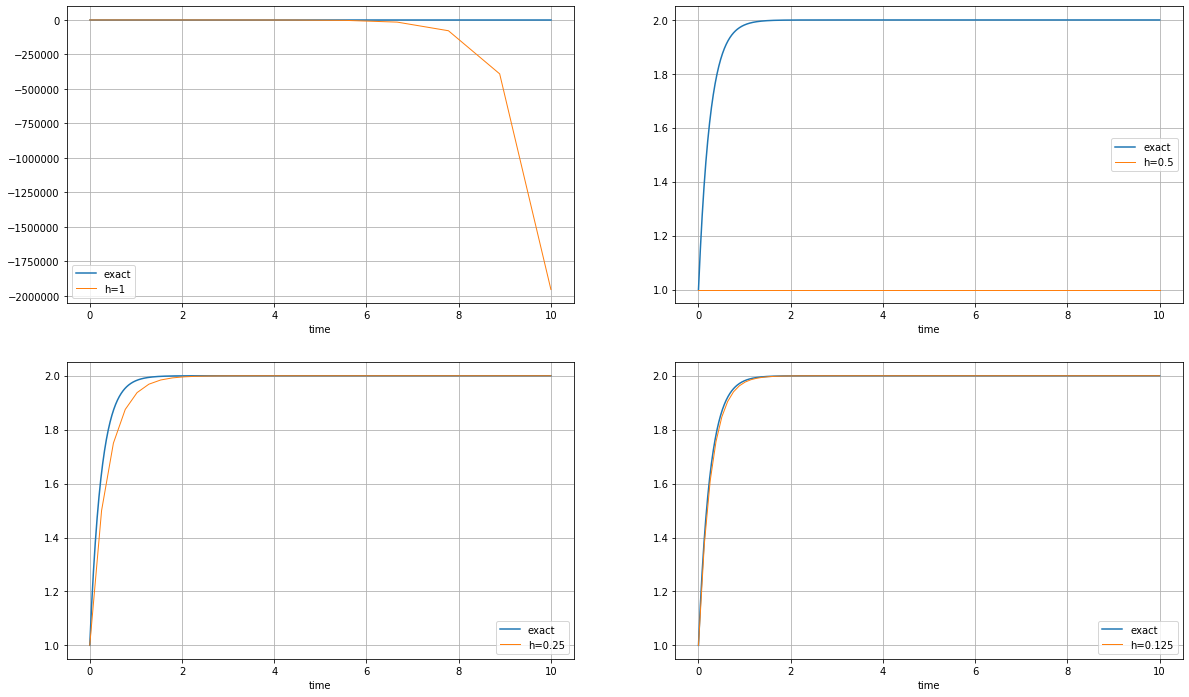

In [14]:
# testModel2
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.subplot(2, 2, 1)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 2)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 3)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 4)
plt.plot(t, func2(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.heun(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 1)
plt.plot(t,res1[:,0], linewidth=1, label='h=1')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.heun(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 2)
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.heun(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 3)
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.heun(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 4)
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.rcParams['figure.figsize'] = (20,12)
plt.show()

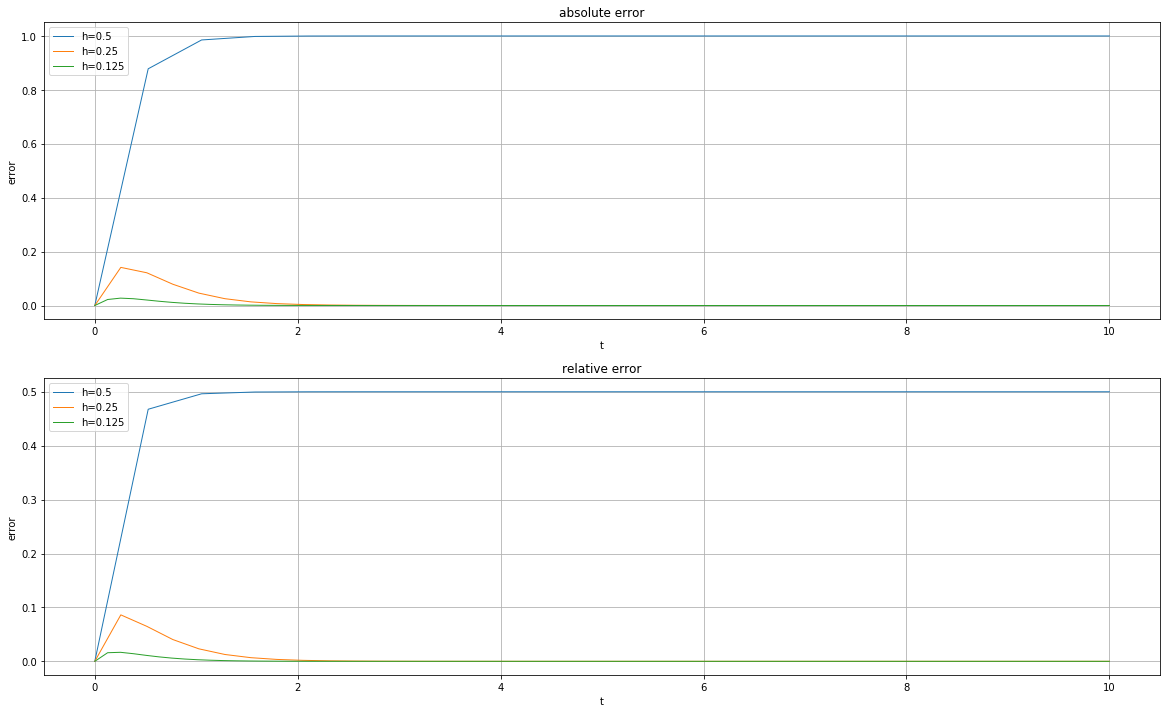

In [15]:
t = np.linspace(0, 10, 10)
e1 = analyze(func2(t), res1[:,0])  # Not plottet, error way too large
t = np.linspace(0, 10, 20)
e2 = analyze(func2(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func2(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func2(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[0], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[1], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

### Runge-Kutta method (4)

#### mathematical description

Uses Taylor expansion. In the fourth-order Runge-Kutta we use the following function:
$$
y(x_0 + h) = y(x_0)+\frac{1}{6}(w_1 + 2w_2 + 2w_3 + w_4)
$$
with
$$
w_1=h*y'(x_0)\\
w_2=h*y'(y_0+\frac{1}{2}w_1)\\
w_3=h*y'(y_0+\frac{1}{2}w_2)\\
w_4=h*y'(y_0+w_3)\\
$$

#### Stepsize variation

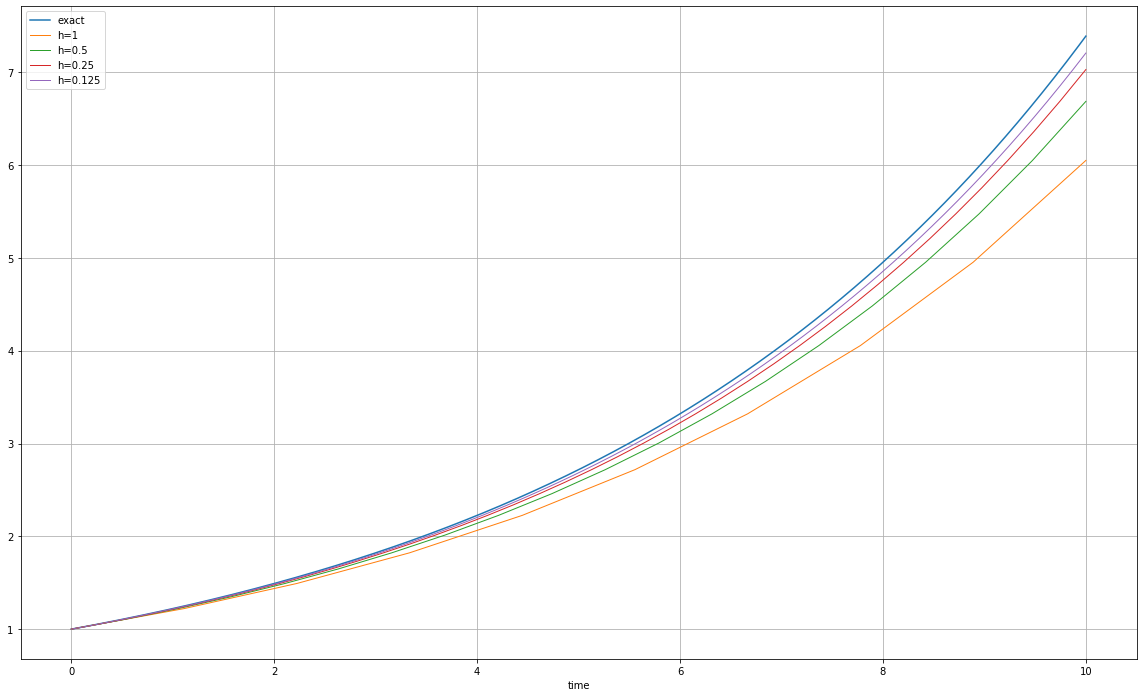

In [16]:
# testModel1
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.plot(t, func1(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.rungeKutta4(testModel1, y0, t, args=(0.2,))
plt.plot(t,res1[:,0], linewidth=1, label='h=1')

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.rungeKutta4(testModel1, y0, t, args=(0.2,))
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.rungeKutta4(testModel1, y0, t, args=(0.2,))
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.rungeKutta4(testModel1, y0, t, args=(0.2,))
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')

plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

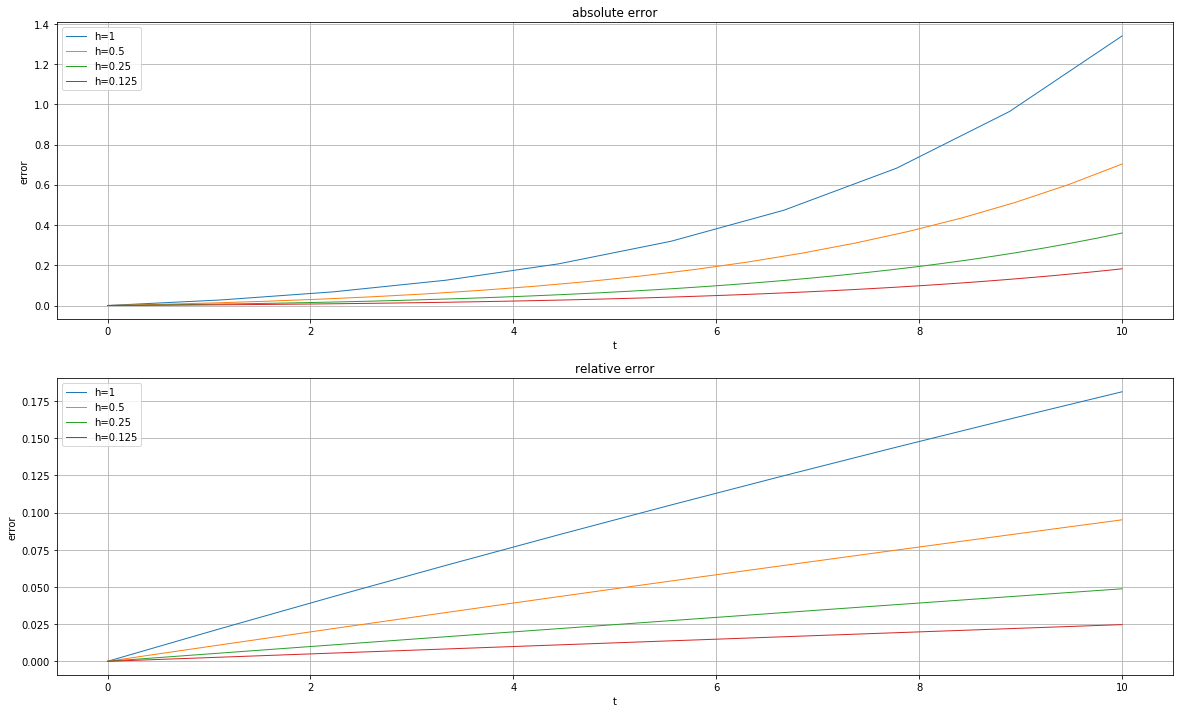

In [17]:
t = np.linspace(0, 10, 10)
e1 = analyze(func1(t), res1[:,0])
t = np.linspace(0, 10, 20)
e2 = analyze(func1(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func1(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func1(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[0], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[1], linewidth=1, label='h=1')
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

##### testMethod2

/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

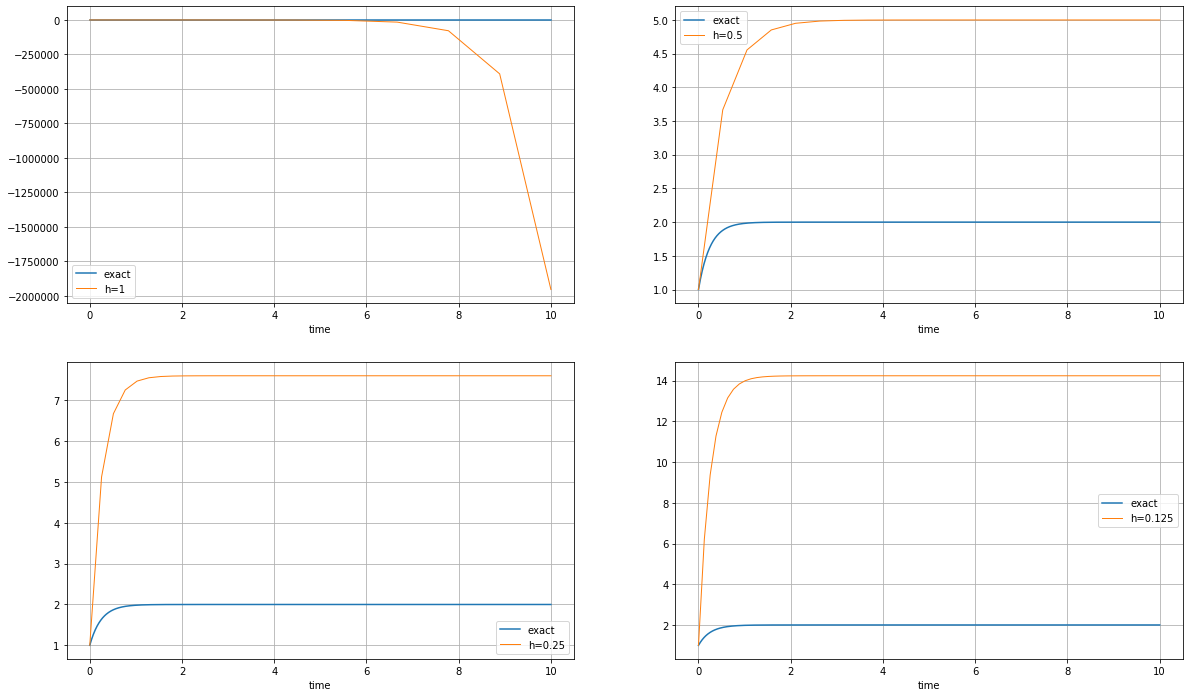

In [18]:
# testModel2
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.subplot(2, 2, 1)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 2)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 3)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 4)
plt.plot(t, func2(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = solver.rungeKutta4(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 1)
plt.plot(t,res1[:,0], linewidth=1, label='h=1')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = solver.rungeKutta4(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 2)
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = solver.rungeKutta4(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 3)
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = solver.rungeKutta4(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 4)
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.rcParams['figure.figsize'] = (20,12)
plt.show()

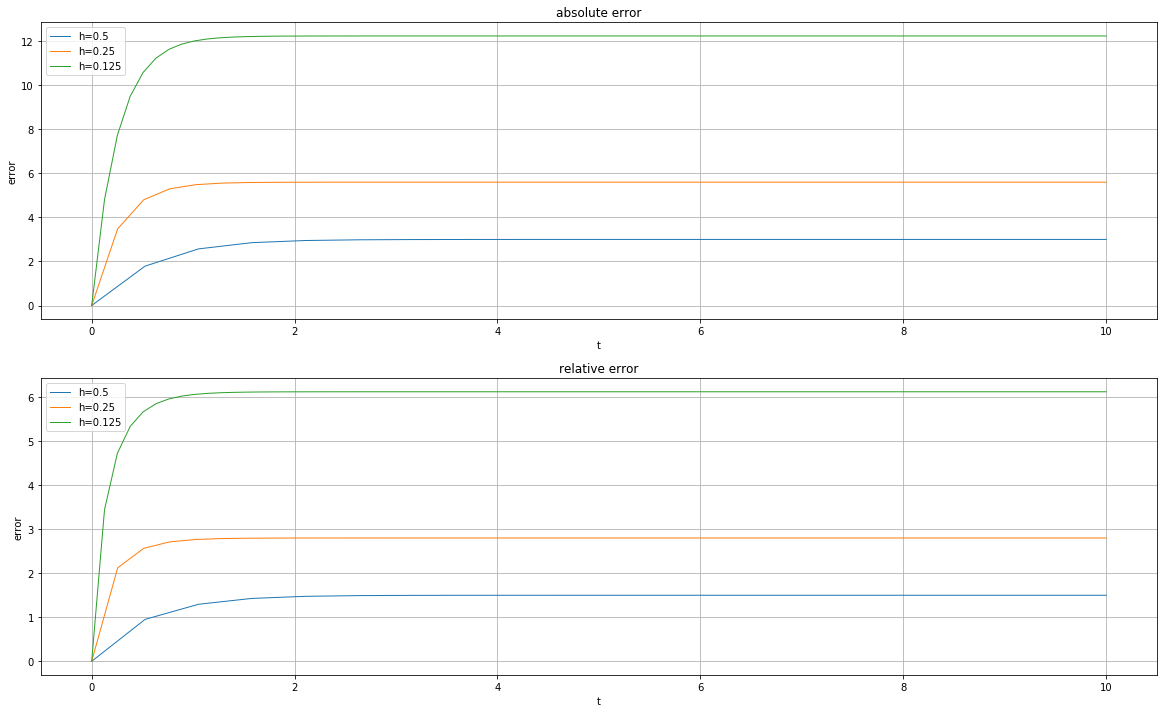

In [19]:
t = np.linspace(0, 10, 10)
e1 = analyze(func2(t), res1[:,0])  # Not plottet, error way too large
t = np.linspace(0, 10, 20)
e2 = analyze(func2(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func2(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func2(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[0], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
#plt.plot(t,e1[1], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

### pre-defined method: odeint

#### description

When using SciPy we have the chance to use multiple modules for ODE integration:
- scipy.integrate.odeint
- scipy.integrate.ode
- scipy.integrate.solve_ivp

In this report we are using scipy.integrate.odeint. 
The documentation could be found at [1].

odeint uses the LSODA algorithm to solve differential equations. 
This algorithm automaticaly switches between stiff and non-stiff methods and therefor produces a quite accurate result [2].
We can not directly influence the step size so the result will be way better than all of our self-written algorithms.

#### results

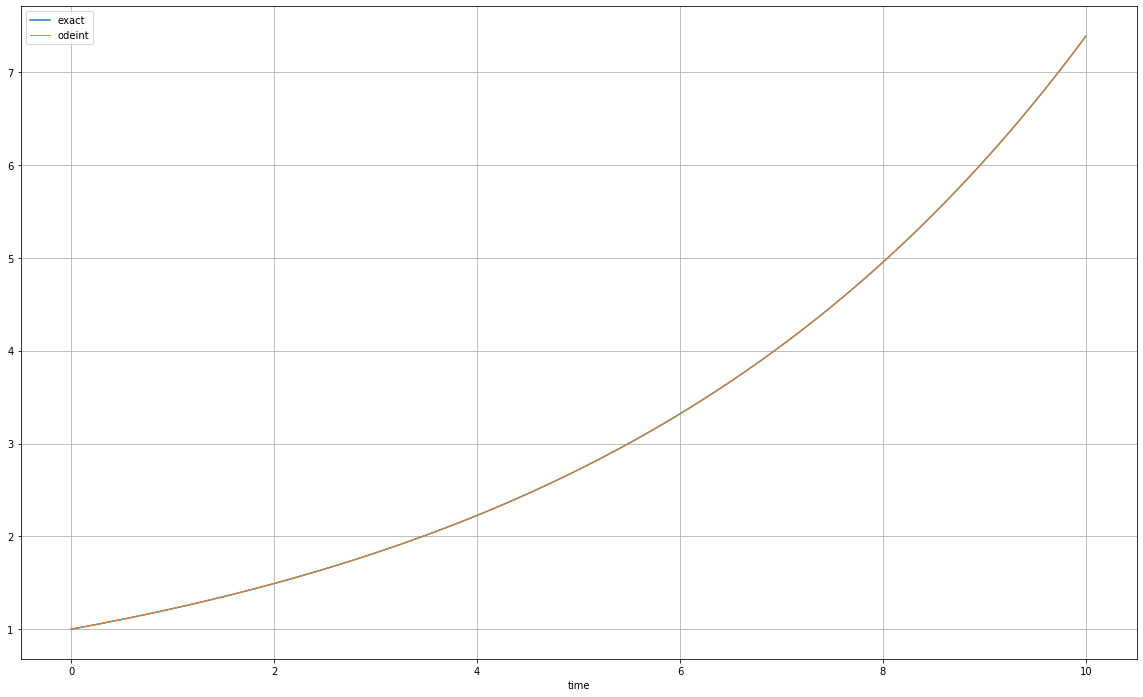

In [20]:
# testModel1
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.plot(t, func1(t), label='exact')

# step size = 1
res1 = odeint(testModel1, y0, t, args=(0.2,))
plt.plot(t,res1[:,0], linewidth=1, label='odeint')

plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

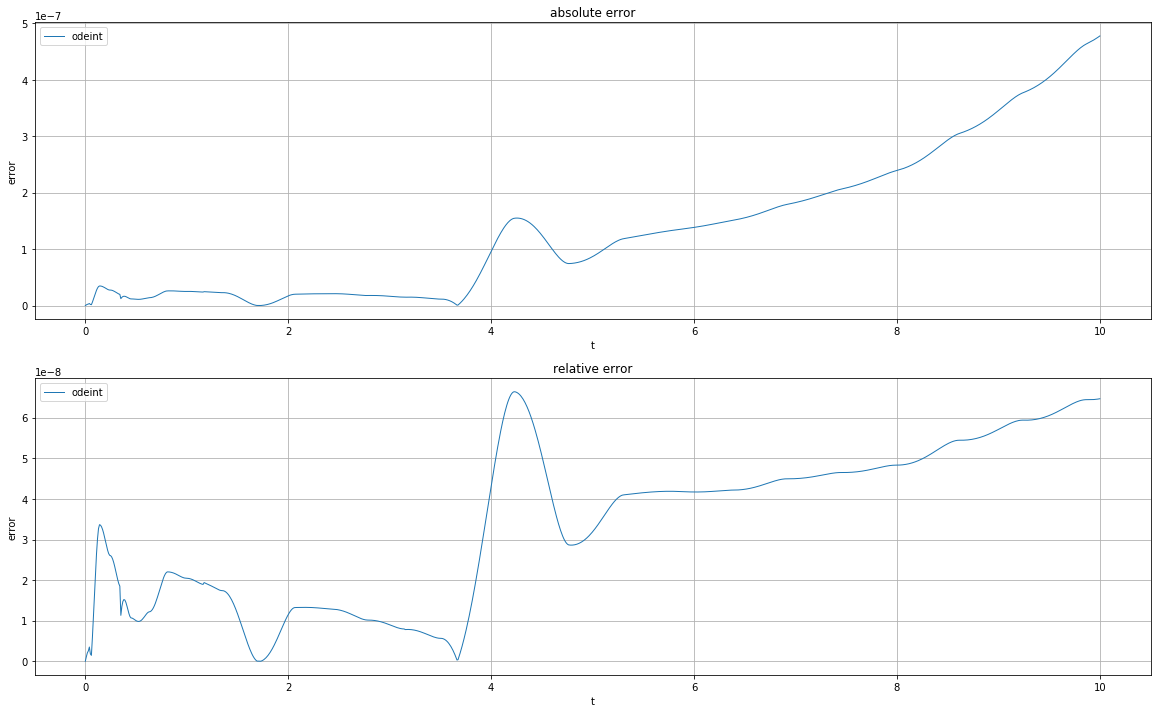

In [21]:
t = np.linspace(0, 10, 1000)
e1 = analyze(func1(t), res1[:,0])

plt.subplot(2, 1, 1)
plt.plot(t,e1[0], linewidth=1, label='odeint')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t,e1[1], linewidth=1, label='odeint')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

##### testMethod2

/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

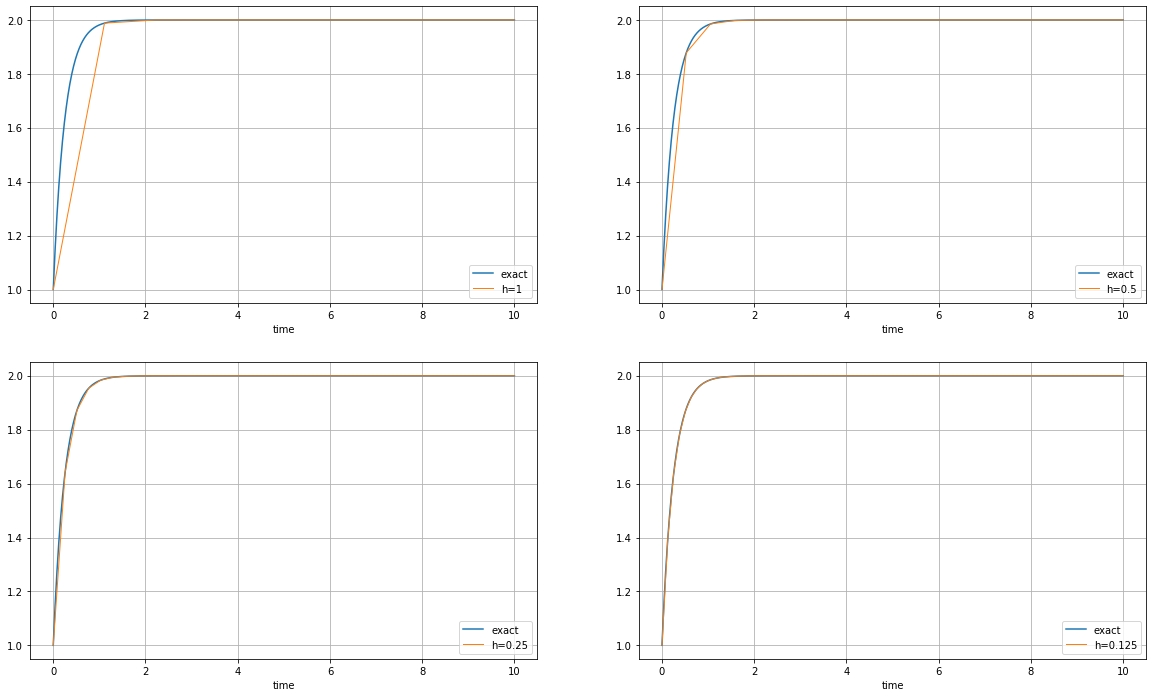

In [22]:
# testModel2
y0 = [1]

# real function
t = np.linspace(0, 10, 1000)
plt.subplot(2, 2, 1)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 2)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 3)
plt.plot(t, func2(t), label='exact')
plt.subplot(2, 2, 4)
plt.plot(t, func2(t), label='exact')

# step size = 1
t = np.linspace(0, 10, 10)
res1 = odeint(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 1)
plt.plot(t,res1[:,0], linewidth=1, label='h=1')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.1
t = np.linspace(0, 10, 20)
res2 = odeint(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 2)
plt.plot(t,res2[:,0], linewidth=1, label='h=0.5')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.01
t = np.linspace(0, 10, 40)
res3 = odeint(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 3)
plt.plot(t,res3[:,0], linewidth=1, label='h=0.25')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

# step size = 0.001
t = np.linspace(0, 10, 80)
res4 = odeint(testModel2, y0, t, args=(0.2,))
plt.subplot(2, 2, 4)
plt.plot(t,res4[:,0], linewidth=1, label='h=0.125')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.rcParams['figure.figsize'] = (20,12)
plt.show()

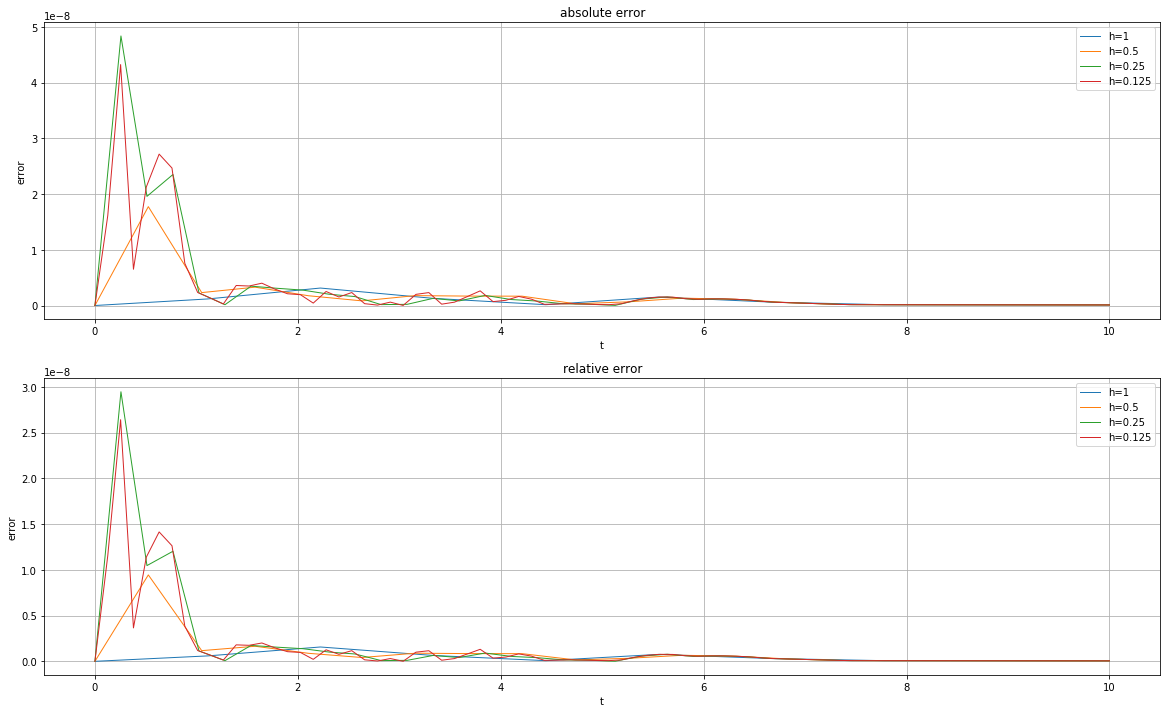

In [23]:
t = np.linspace(0, 10, 10)
e1 = analyze(func2(t), res1[:,0]) 
t = np.linspace(0, 10, 20)
e2 = analyze(func2(t), res2[:,0])
t = np.linspace(0, 10, 40)
e3 = analyze(func2(t), res3[:,0])
t = np.linspace(0, 10, 80)
e4 = analyze(func2(t), res4[:,0])

plt.subplot(2, 1, 1)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[0], linewidth=1, label='h=1') 
t = np.linspace(0, 10, 20)
plt.plot(t,e2[0], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[0], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[0], linewidth=1, label='h=0.125')
plt.title("absolute error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.subplot(2, 1, 2)
t = np.linspace(0, 10, 10)
plt.plot(t,e1[1], linewidth=1, label='h=1') # Not plottet, error way too large
t = np.linspace(0, 10, 20)
plt.plot(t,e2[1], linewidth=1, label='h=0.5')
t = np.linspace(0, 10, 40)
plt.plot(t,e3[1], linewidth=1, label='h=0.25')
t = np.linspace(0, 10, 80)
plt.plot(t,e4[1], linewidth=1, label='h=0.125')
plt.title("relative error")
plt.xlabel('t')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()

plt.show()

## Runtime analyse

For the runtime analyse, we execute the algorithm for both test functions 10000 times.
To get the time needed for the execution, we take timestamps before and after the execution loop.  
Afterwards we calculate the time needed for one execution by deviding the resulting time by 10000.

In [24]:
# Euler
print("===== TIME MEASURE =====")
print("------    EULER     ------")
start = time.time()
res = 0
for i in range(10000):
    res = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
    res = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
end = time.time()
print("Total execution time: ",(end - start), " seconds")
print("Time for one execution: ",(end - start)/10000, " seconds")
print()

# Runge
print("------    RUNGE     ------")
start = time.time()
res = 0
for i in range(10000):
    res = solver.runge(testModel1, y0, t, args=(0.2,))
    res = solver.runge(testModel2, y0, t, args=(0.2,))
end = time.time()
print("Total execution time: ",(end - start), " seconds")
print("Time for one execution: ",(end - start)/10000, " seconds")
print()

# Heun
print("------    HEUN     ------")
start = time.time()
res = 0
for i in range(10000):
    res = solver.heun(testModel1, y0, t, args=(0.2,))
    res = solver.heun(testModel2, y0, t, args=(0.2,))
end = time.time()
print("Total execution time: ",(end - start), " seconds")
print("Time for one execution: ",(end - start)/10000, " seconds")
print()

# Runge-Kutta
print("------    RUNGE-KUTTA     ------")
start = time.time()
res = 0
for i in range(10000):
    res = solver.expliciteEuler(testModel1, y0, t, args=(0.2,))
    res = solver.expliciteEuler(testModel2, y0, t, args=(0.2,))
end = time.time()
print("Total execution time: ",(end - start), " seconds")
print("Time for one execution: ",(end - start)/10000, " seconds")
print()

# odeint
print("------    ODEINT     ------")
start = time.time()
res = 0
for i in range(10000):
    res = odeint(testModel1, y0, t, args=(0.2,))
    res = odeint(testModel2, y0, t, args=(0.2,))
end = time.time()
print("Total execution time: ",(end - start), " seconds")
print("Time for one execution: ",(end - start)/10000, " seconds")
print()

===== TIME MEASURE =====
------    EULER     ------
Total execution time:  7.028012275695801  seconds
Time for one execution:  0.0007028012275695801  seconds

------    RUNGE     ------
Total execution time:  9.267817735671997  seconds
Time for one execution:  0.0009267817735671997  seconds

------    HEUN     ------
Total execution time:  9.523061275482178  seconds
Time for one execution:  0.0009523061275482177  seconds

------    RUNGE-KUTTA     ------
Total execution time:  6.799114942550659  seconds
Time for one execution:  0.000679911494255066  seconds

------    ODEINT     ------
Total execution time:  4.670603275299072  seconds
Time for one execution:  0.0004670603275299072  seconds



## Conclusion

After some small tests with these algorithms, we can see that there are huge differences between multiple numerical approaches.  
With our tests we measured the speed of an algorithm, it's numerical stability and the effect of the chosen step size.  

All together we can say that all of these algorithms can solve odes but we could see a huge difference between the needed step size to get an accurate fit.  
With testModel2 we got a simple stiff equation, showing that especially with a big step size we do not get the results we expect.

These tests were only basic measures and therefor not representative.
The next step would be to examine more stiff equations and the behaviour of the different algorithms.
It would be also interesting to checkout other equations where odeint faces some problems.

## Quellen

[link] https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html  
[2] NASA Reference Publication 1327 Lawrence Livermore Nationai Laboratory Report UCRL-ID-113855 